### Autor: Mateusz Olszewski, nr 145247

# Zbiór danych:

Zbiór danych został pobrany ze strony: https://www.kaggle.com/rtatman/chocolate-bar-ratings. Jego autorem jest Brady Brelinski - założyciel the Manhattan Chocolate Society. Baza zawiera informacje o ocenach ponad 1700 tabliczek czekolady. Autor podczas jej tworzenia skupiał się przede wszystkim na gorzkich czekoladach. Przy ocenie brane są pod uwagę tylko i wyłącznie walory smakowe - nie jest uwzględniony np. wpływ zdrowotny. Jej zakres wynosi od 1 do 5 i ma następujące znaczenie:

- 5 - elitarna (smak przekracza standardowe limity)
- 4 - premium (doskonały rozwój smaku, charakteru i stylu)
- 3 - zadowalająca (godna pochwały)
- 2 - rozczarowująca (zawiera co najmniej jedną istotną wadę)
- 1 - nieprzyjemna (w większości niesmacza)

W bazie występują następujące kolumny:

- Company (Maker-if known) - nazwa producenta
- Specific Bean Origin or Bar Name - region pochodzenia czekolady
- REF - wartość powiązana z czasem dodania do bazy (im więcej tym wcześniej dodana ocena)
- ReviewDate - rok publikacji recenzji
- CocoaPercent - zawartość kakao w %
- CompanyLocation - kraj pochodzenia producenta
- Rating - ocena czekolady
- BeanType - rodzaj ziaren kakaowca
- Broad Bean Origin - pochodzenie ziaren kakaowca

# 1) Analiza eksploracyjna

## 1.1) Wczytanie bibliotek

In [2]:
suppressMessages({
    library(ggplot2)
    library(ggExtra)
    library(gridExtra)
    library(forcats)
    library(tidyverse)
}) 

Pierwszym krokiem jest wczytanie bibliotek (wymagane są m.in. do rysowania wykresów).

## 1.2) Przegląd danych

In [3]:
data <- read.csv(file = 'flavors_of_cacao.csv')
summary(data)
head(data, n=5)
tail(data, n=5)

 CompanyÂ...Maker.if.known.   Specific.Bean.Origin.or.Bar.Name      REF      
 Soma    :  47              Madagascar        :  57            Min.   :   5  
 Bonnat  :  27              Peru              :  45            1st Qu.: 576  
 Fresco  :  26              Ecuador           :  42            Median :1069  
 Pralus  :  25              Dominican Republic:  37            Mean   :1036  
 A. Morin:  23              Venezuela         :  21            3rd Qu.:1502  
 Arete   :  22              Chuao             :  19            Max.   :1952  
 (Other) :1625              (Other)           :1574                          
  Review.Date   Cocoa.Percent Company.Location     Rating     
 Min.   :2006   70%    :672   U.S.A. :764      Min.   :1.000  
 1st Qu.:2010   75%    :222   France :156      1st Qu.:2.875  
 Median :2013   72%    :189   Canada :125      Median :3.250  
 Mean   :2012   65%    : 78   U.K.   : 96      Mean   :3.186  
 3rd Qu.:2015   80%    : 72   Italy  : 63      3rd Qu.:3.500 

CompanyÂ...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
A. Morin,Agua Grande,1876,2016,63%,France,3.75,Â,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,Â,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,Â,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,Â,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,Â,Peru


,CompanyÂ...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
1791,Zotter,Peru,647,2011,70%,Austria,3.75,Â,Peru
1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,Â,India
1795,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,Â,Brazil


Następnie sprawdzam jak wyglądają dane (czy są jakieś błędy). Zauważyłem, że w 2 ostatnich kolumnach pojawiają się wartości "Â", które powinny oznaczać wartość nieznaną. Innym problemem jest typ danych kolumny Cocoa.Percent:

In [4]:
class(data$Cocoa.Percent)

[1] "factor"

Wygodniej dla dalszych obliczeń byłoby zamienienie jej na typ numeryczny.

## 1.3) Oczyszczenie danych

In [5]:
names(data) <- c("Company", "Specific_origin", "REF", "Review_date", "Cocoa_percent", "Company_location", "Rating", "Bean_type", "Bean_origin")
data$Cocoa_percent <- as.numeric(sub("%", "", data$Cocoa_percent)) / 100
data[, c(8,9)] <- sapply(data[,c(8,9)], str_trim)
is.na(data) <- data=='Â'
head(data, n=5)
tail(data, n=5)

Company,Specific_origin,REF,Review_date,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NA,Sao Tome
A. Morin,Kpime,1676,2015,0.70,France,2.75,NA,Togo
A. Morin,Atsane,1676,2015,0.70,France,3.00,NA,Togo
A. Morin,Akata,1680,2015,0.70,France,3.50,NA,Togo
A. Morin,Quilla,1704,2015,0.70,France,3.50,NA,Peru


,Company,Specific_origin,REF,Review_date,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
1791,Zotter,Peru,647,2011,0.70,Austria,3.75,NA,Peru
1792,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1793,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1794,Zotter,Kerala State,781,2011,0.62,Austria,3.25,NA,India
1795,Zotter,"Brazil, Mitzi Blue",486,2010,0.65,Austria,3.00,NA,Brazil


Najpierw zamieniam nazwy kolumn na czytelniejsze. Następnie wszytkie wartości dwóch ostatnich kolumn które wynoszą "Â" zostają zamienione na wartości nieznane. Kolumna Cocoa_percent od teraz zawiera wartości o typie numerycznym.

## 1.4) Liczba wystąpień krajów i rodzajów ziaren

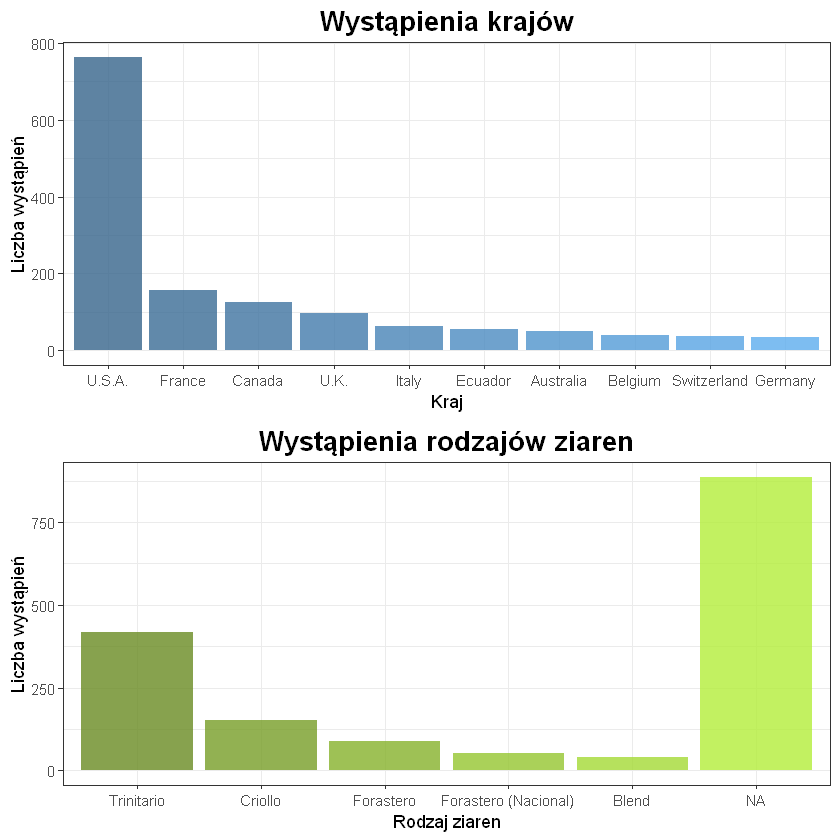

In [6]:
df <- data.frame(sort(table(data$Company_location)))
names(df) <- c('Kraj', 'Liczba_wystąpień')
df$id = 1:nrow(df)
g1 <- df %>% arrange(Liczba_wystąpień) %>% top_n(10,Liczba_wystąpień) %>% ggplot(aes(x=reorder(Kraj,-Liczba_wystąpień), y=Liczba_wystąpień, fill = id)) +
        geom_bar(stat="identity", alpha=.8, width=.9, ) +
        ggtitle('Wystąpienia krajów') +
        xlab("Kraj") +
        ylab("Liczba wystąpień") +
        theme_bw() +
        theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5)) +
        theme(legend.position = "none") +
        scale_fill_gradient(low='steelblue2', high='steelblue4')
df <- data.frame(sort(table(data$Bean_type, useNA='ifany'), decreasing=TRUE))
names(df) <- c('Rodzaj_nasion', 'Liczba_wystąpień')
df$id = 1:nrow(df)
df[1,3] = 7
g2 <- df %>% arrange(Liczba_wystąpień) %>% top_n(6,Liczba_wystąpień) %>% ggplot(aes(x=reorder(Rodzaj_nasion,-Liczba_wystąpień), y=Liczba_wystąpień, fill = id)) +
        geom_bar(stat="identity", alpha=.8, width=.9, ) +
        ggtitle('Wystąpienia rodzajów ziaren') +
        xlab("Rodzaj ziaren") +
        ylab("Liczba wystąpień") +
        theme_bw() +
        theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5)) +
        theme(legend.position = "none") +
        scale_fill_gradient(low='olivedrab4', high='olivedrab2')

grid.arrange(g1, g2, nrow = 2)

Pierwszymi wykresami są wykresy słupkowe sprawdzające liczbę wystąpień poszczególnych krajów i rodzajów ziaren. Ze względu na ich dużą liczbę, przedstawione zostało tylko 10 najczęściej występujących krajów oraz 6 najpopularniejszych rodzajów ziaren. Z wykresów odczytać można, że znaczna część bazy danych składa się z tabliczek czekolady produkowanych przez firmy z USA (ponad 750). Następnym krajem jest Francja (tylko ok. 150), a liczba wystąpień kolejnych krajów powoli spada. Inną ważną obserwacją, jest fakt, że bardzo duża część czekolad składa się z nieznanego rodzaju ziaren.

## 1.5) Szereg rozdzielczy zawartości kakao

In [7]:
n <- nrow(data)
1+3.322*log(n)

[1] 25.89095

Liczbę przedziałów szeregu rozdzielczego postanowiłem wyznaczyć stosując powyższą heurystykę i otrzymany wynik zaokrągliłem do 26:

In [8]:
przedzialy <- cut(data$Cocoa_percent, breaks=26)
table(przedzialy)

przedzialy
(0.419,0.442] (0.442,0.465] (0.465,0.487] (0.487,0.509] (0.509,0.532] 
            1             1             0             1             1 
(0.532,0.554] (0.554,0.576] (0.576,0.598] (0.598,0.621] (0.621,0.643] 
           16             3             8            66            46 
(0.643,0.665] (0.665,0.688]  (0.688,0.71]  (0.71,0.732] (0.732,0.755] 
          101            74           713           233           274 
(0.755,0.777] (0.777,0.799] (0.799,0.822] (0.822,0.844] (0.844,0.866] 
           56            18            94             8            37 
(0.866,0.888] (0.888,0.911] (0.911,0.933] (0.933,0.955] (0.955,0.978] 
            9            13             0             0             0 
    (0.978,1] 
           22 

## 1.6) Histogramy zawartości kakao i ocen

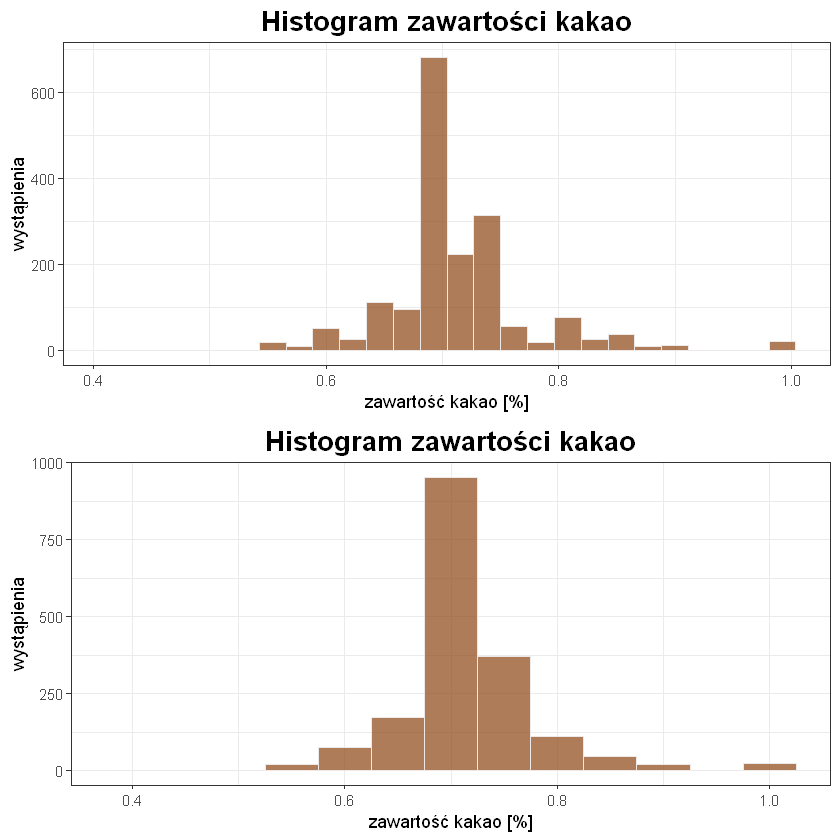

In [9]:
g1 <- ggplot(data, aes(x=Cocoa_percent)) + 
  geom_histogram( binwidth=0.6/26, fill="chocolate4", color="snow2", alpha=0.7) +
    ggtitle("Histogram zawartości kakao") +
    xlab('zawartość kakao [%]') +
    ylab('wystąpienia') +
    theme_bw() +
    theme(plot.title = element_text(size = 16, face = "bold", hjust=0.5))
g2 <- ggplot(data, aes(x=Cocoa_percent)) + 
  geom_histogram( binwidth=0.05, fill="chocolate4", color="snow2", alpha=0.7) +
    ggtitle("Histogram zawartości kakao") +
    xlab('zawartość kakao [%]') +
    ylab('wystąpienia') +
    theme_bw() +
    theme(plot.title = element_text(size = 16, face = "bold", hjust=0.5))
grid.arrange(g1, g2, nrow = 2)

Zarówno szereg rozdzielczy jak i pierwszy histogram zawierają 26 przedziałów. Widoczne są wówczas w niektórych miejscach dziwne obniżenia liczby wystąpień w stosunku do sąsiednich przedziałów. Jest to prawdopodobnie związane z tym, że firmy wolą produkować czekolady o okrągłych wartościach zawartości kakao (np. 65%, 70%, 75%). Przedziały drugiego histogramu zwiększają się co 5%, dzięki czemu obniżenia przestają być widoczne. Zobaczyć można na nim jeden wysoki słupek przy wartości 70% (sąsiednie słupki są znacznie niższe). Dostrzec można również wyróżniający się słupek przy 100%.

Tak by wówczas wyglądał poprawiony szereg rozdzielczy:

In [10]:
n <- 0.6/0.05
przedzialy <- cut(data$Cocoa_percent, breaks=n)
print(table(przedzialy))

przedzialy
(0.419,0.473] (0.473,0.525] (0.525,0.578] (0.578,0.631] (0.631,0.684] 
            2             1            20            86           209 
(0.684,0.736] (0.736,0.789] (0.789,0.842] (0.842,0.895] (0.895,0.947] 
          948           345           103            48            11 
    (0.947,1] 
           22 


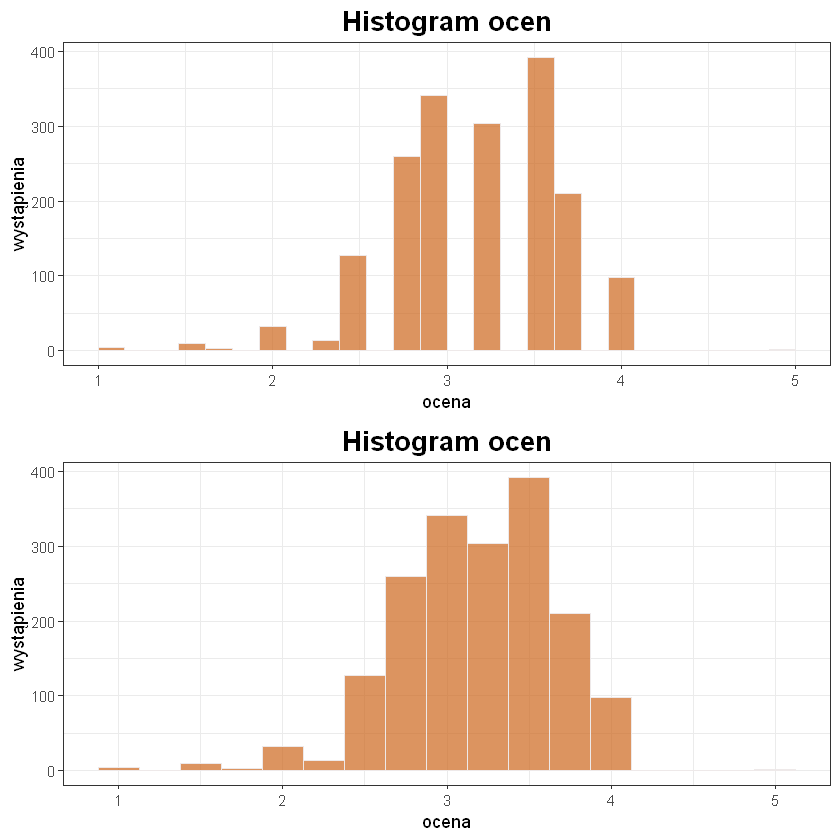

In [11]:
g1 <- ggplot(data, aes(x=Rating)) + 
  geom_histogram( binwidth=4/26, fill="chocolate3", color="snow2", alpha=0.7) +
    ggtitle("Histogram ocen") +
    xlab('ocena') +
    ylab('wystąpienia') +
    theme_bw() +
    theme(plot.title = element_text(size = 16, face = "bold",hjust=0.5))
g2 <- ggplot(data, aes(x=Rating)) + 
  geom_histogram( binwidth=0.25, fill="chocolate3", color="snow2", alpha=0.7) +
    ggtitle("Histogram ocen") +
    xlab('ocena') +
    ylab('wystąpienia') +
    theme_bw() +
    theme(plot.title = element_text(size = 16, face = "bold",hjust=0.5))
grid.arrange(g1, g2, nrow = 2)

Tutaj problemy są jeszcze bardziej widoczne. Dla pierwszego histogramu, który ma 26 przedziałów, pojawiają się widoczne dziury. Jest to związane z tym, że oceny recenzentów zwiększąją się co 0.25 i nie przyjmują żadnych innych wartości:

In [12]:
table(data$Rating)


   1  1.5 1.75    2 2.25  2.5 2.75    3 3.25  3.5 3.75    4    5 
   4   10    3   32   14  127  259  341  303  392  210   98    2 

Przedziały drugiego histogramu zwiększają się co 0.25, dzięki czemu dziury znikają. Z histogramu dowiedzieć się można, że bardzo duża część ocen zawiera się w przedziale 3-4. Natomiasy oceny powyżej 4 są niezwykle rzadkie.

## 1.7) Statystyki opisowe ocen

In [13]:
MomentCentralny <- function(dane, n){
    x <- mean(dane)
    return(sum((dane - x)^n)/length(dane))
}

dane <- data$Rating
summary(dane)
cat("\nWariancja próby: ")
cat(var(dane))
cat("\nOdch. st. próby: ")
cat(sd(dane))
cat("\n\nWspółczynnik asymetrii: ")
cat(MomentCentralny(dane, 3)/sqrt(MomentCentralny(dane, 2))^3)
cat("\nWspółczynnik koncentracji: ")
cat(MomentCentralny(dane, 4)/sqrt(MomentCentralny(dane, 2))^4)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.875   3.250   3.186   3.500   5.000 


Wariancja próby: 0.2285437
Odch. st. próby: 0.4780624

Współczynnik asymetrii: -0.5784473
Współczynnik koncentracji: 4.127678

Z powyższych informacji odczytać można, że 50% obserwacji znajduje się pomiędzy 2.875 a 3.500. Zarówno średnia jak i mediana są nieco wyższe niż 3. Współczynnik asymetrii wskazuje na to, że jest to rozkład umiarkowanie lewostronnie skośny. Ze współczynnika koncentracji dowiedzieć się można, że rozkład jest bardziej wyostrzony od rozkładu normalnego (dla niego wpółczynnik ten wynosi 3).

## 1.8) Wykres zależności pomiędzy zawartością kakao a oceną czekolady

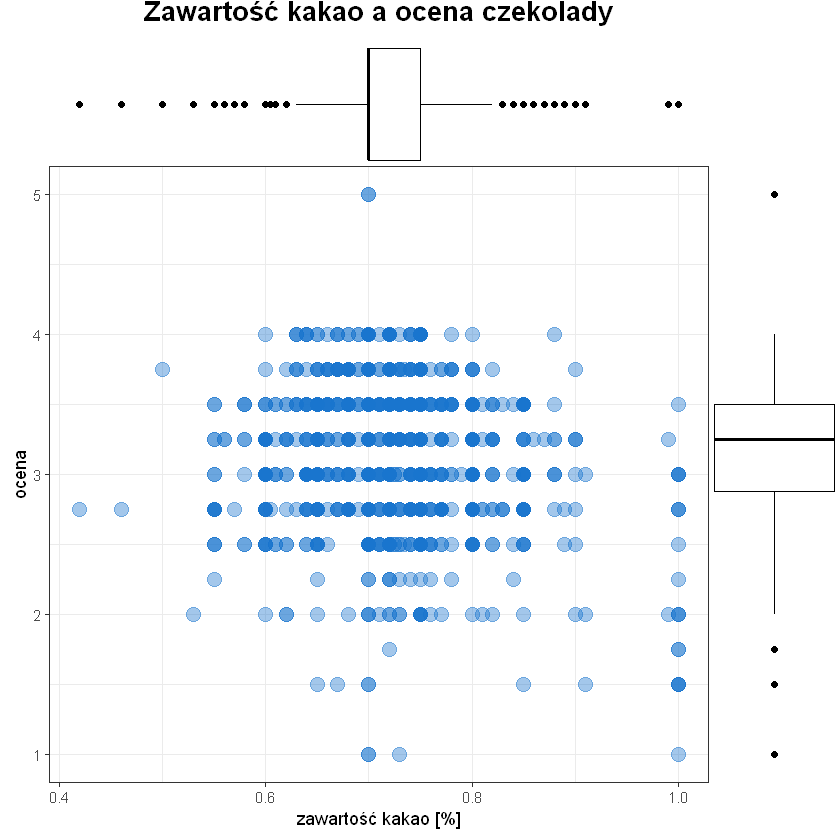

In [14]:
p <- ggplot(data, aes(x=Cocoa_percent, y=Rating)) +
    geom_point(size=4, color="dodgerblue3",alpha=0.4) +
    ggtitle("Zawartość kakao a ocena czekolady") +
    xlab('zawartość kakao [%]') +
    ylab('ocena') +
    theme(legend.position="none") +
    theme_bw() +
    theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5))
 ggMarginal(p, type="boxplot")

Wykres przedstawia zależność między oceną a zawartością kakao (scatter plot) z wykresami pudełkowymi znajdującymi się na osiach. Na wykresach pudełkowych dostrzec można, że zawartość kakao zawiera wiele wartości odstających. Co ciekawe, jego pierwszy kwartyl wynosi tyle samo co mediana. Na wykresie punktowym można teoretycznie zauważyć pewną zależność (im większa zawartość kakao tym gorsza ocena), lecz zostanie to sprawdzone za pomocą korelacji i regresji później.

## 1.9) Producenci i kraje z najlepszą/najgorszą średnią ocen

In [15]:
narysuj_wykres <- function(data, title, margins, colors, margin_size, hjust) {
    g <- ggplot(data, aes(x=nazwa, y=srednia, fill = id)) +
        geom_bar(stat="identity", alpha=.7, width=.9, ) +
        ggtitle(title) +
        xlab("") +
        ylab("Ocena") +
        coord_flip(ylim = margins) +
        geom_text(aes(label=round(srednia,3)), hjust= -0.5, size=4.5)+
        theme_bw() +
        theme(plot.title = element_text(size = 16, face = "bold", hjust = hjust)) +
        theme(axis.title.y = element_text(margin=margin(0,0,0,margin_size))) +
        theme(legend.position = "none") +
        scale_fill_gradient(low=colors[1], high=colors[2])

    return(g)
}

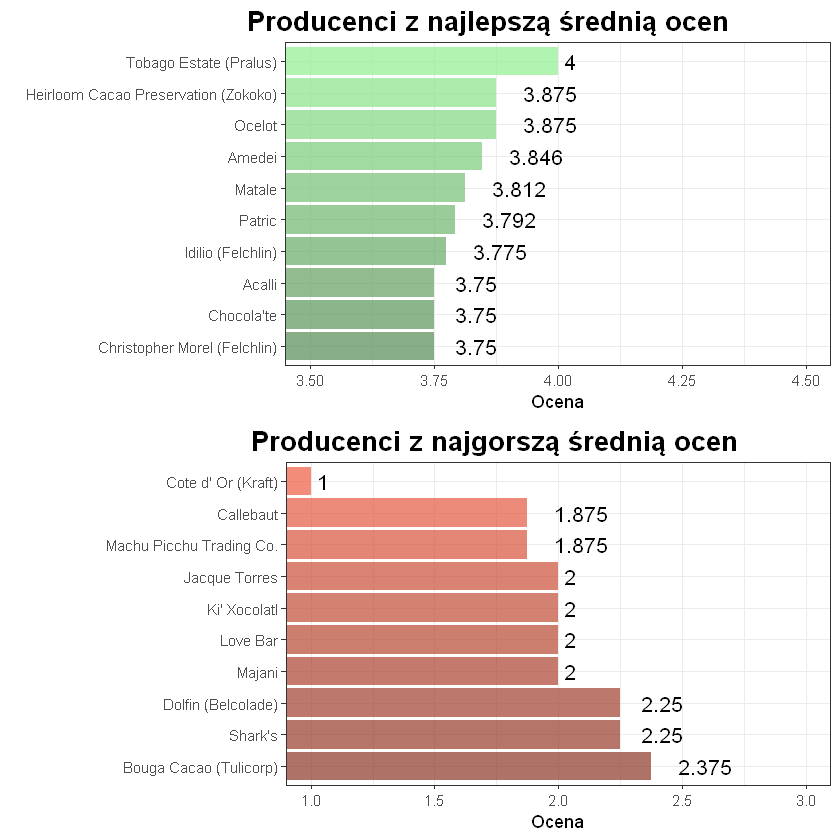

In [16]:
producenci <- names(table(data$Company))
value <- 1:length(producenci)
for(i in 1:length(producenci)){
    subData <- subset(data, Company == producenci[i])
    value[i] <- mean(subData$Rating)
}
result <- data.frame( producent = producenci, srednia = value)

result <- result[order(result$srednia, decreasing = TRUE),]
result$id = 1:nrow(result)
dane1 <- result[1:10,] %>% mutate(nazwa = fct_reorder(producent, desc(id)))
g1 <- narysuj_wykres(dane1, "Producenci z najlepszą średnią ocen", c(3.5, 4.5), c('palegreen2', 'palegreen4'), 0, -0.6)

result <- result[order(result$srednia, decreasing = FALSE),]
result$id = 1:nrow(result)
dane2 <- result[1:10,] %>% mutate(nazwa = fct_reorder(producent, desc(id))) 
g2 <- narysuj_wykres(dane2, "Producenci z najgorszą średnią ocen", c(1, 3), c('tomato2', 'tomato4'), 48, -0.6)

grid.arrange(g1, g2, nrow = 2)

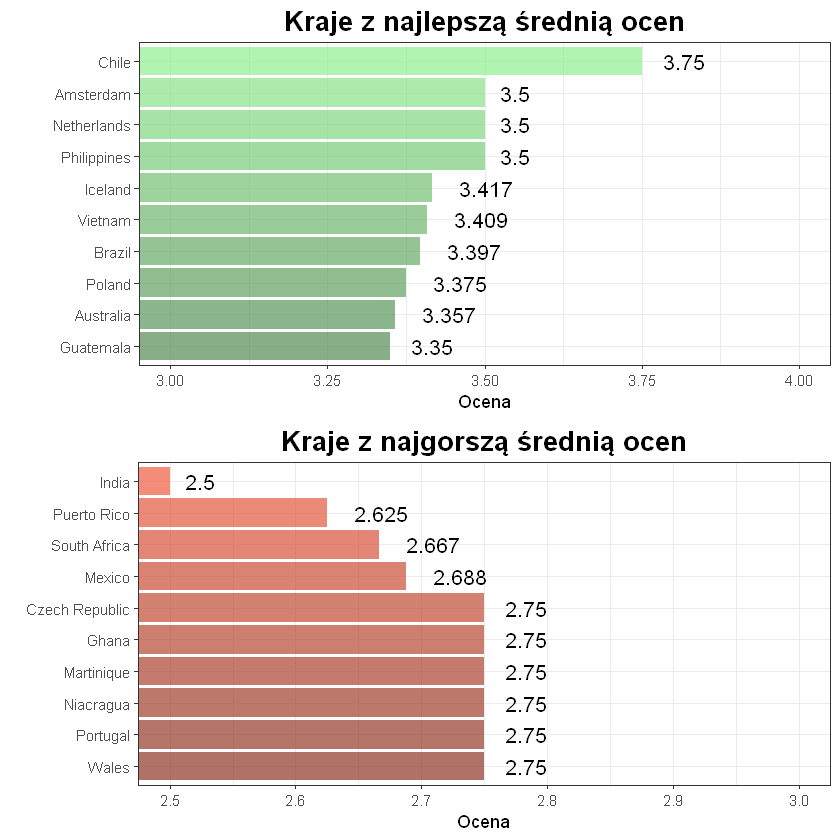

In [17]:
kraje <- names(table(data$Company_location))
value <- 1:length(kraje)
for(i in 1:length(kraje)){
    subData <- subset(data, Company_location == kraje[i])
    value[i] <- mean(subData$Rating)
}
result <- data.frame( kraj = kraje, srednia = value)

result <- result[order(result$srednia, decreasing = TRUE),]
result$id = 1:nrow(result)
dane1 <- result[1:10,] %>% mutate(nazwa = fct_reorder(kraj, desc(id))) 
g1 <- narysuj_wykres(dane1, "Kraje z najlepszą średnią ocen", c(3, 4), c('palegreen2', 'palegreen4'), 16, 0.5)

result <- result[order(result$srednia, decreasing = FALSE),]
result$id = 1:nrow(result)
dane2 <- result[1:10,] %>% mutate(nazwa = fct_reorder(kraj, desc(id))) 
g2 <- narysuj_wykres(dane2, "Kraje z najgorszą średnią ocen", c(2.5, 3), c('tomato2', 'tomato4'), 0, 0.5)

grid.arrange(g1, g2, nrow = 2)

W przypadku powyższych 4 wykresów pierwszą rzeczą, którą zauważyłem, jest to że istnieje producent który ma średnią ocen równą 1. Jest tak jednak dlatego, ponieważ w bazie istnieje tylko jedna czekolada tego producenta:

In [18]:
subset(data, Company == "Cote d' Or (Kraft)")

,Company,Specific_origin,REF,Review_date,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
466,Cote d' Or (Kraft),Sensations Intense,48,2006,0.7,Belgium,1,NA,NA


Podobnie jest w przypadku najgorszego kraju:

In [19]:
subset(data, Company_location == "India")

,Company,Specific_origin,REF,Review_date,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin
867,Indah,India (south),1788,2016,0.61,India,2.5,NA,India


W wielu innych przypadkach również okaże się, że istnieje tylko jedna obserwacja dla danego producenta/kraju, więc dokładność średnich w powyższych wykresach jest dość niska i ma tylko zastosowanie poglądowe.

## 1.10) Średnia ocen i zawartość kakao na przestrzeni lat

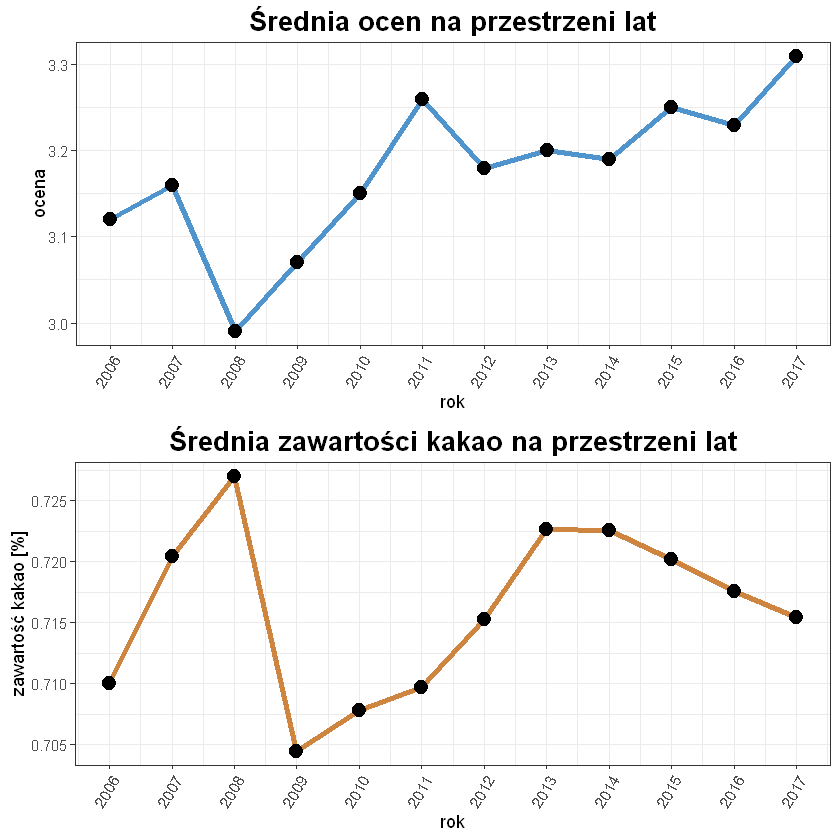

In [20]:
years <- sort(unique(data$Review_date))
value1 <- 1:length(years)
value2 <- 1:length(years)
for(i in 1:length(years)){
    subData <- subset(data, Review_date == years[i])
    value1[i] <- mean(subData$Rating)
    value2[i] <- mean(subData$Cocoa_percent)
}

value1 <- round(value1,2)

result <- data.frame( rok = years, srednia = value1 )
g1 <- ggplot(result,aes(x=rok, y=srednia)) +
    geom_line( color="steelblue3", size = 1.6) + 
    geom_point(size=3.5) +
    ggtitle("Średnia ocen na przestrzeni lat") +
    xlab("rok") +
    ylab("ocena") +
    scale_x_continuous(breaks=years) +
    theme_bw() +
    theme(axis.text.x=element_text(angle=60, hjust=1)) +
    theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5)) +
    theme(axis.title.y = element_text(margin=margin(0,0,0,13))) 

result <- data.frame( rok = years, srednia = value2 )
g2 <- ggplot(result,aes(x=rok, y=srednia)) +
    geom_line( color="tan3", size = 1.6) + 
    geom_point(size=3.5) +
    ggtitle("Średnia zawartości kakao na przestrzeni lat") +
    xlab("rok") +
    ylab("zawartość kakao [%]") +
    scale_x_continuous(breaks=years) +
    theme_bw() +
    theme(axis.text.x=element_text(angle=60, hjust=1)) +
    theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5))

grid.arrange(g1, g2, nrow = 2)

Na powyższych wykresach dostrzec można, że średnia ocena w roku 2017 była wyższa niż w roku 2006. Pomiędzy tymi latami nie było jednak monotonicznego wzrostu. Na podstawie samego wykresu ciężko stwierdzić czy istnieje jakakolwiek zależność. W przypadku drugiego wykresu zauważyć można pewne zmiany w średniej zawartości kakao, lecz po sprawdzeniu skali osi Y okazuje się, że zmiany te są bardzo małe.

# 2) Korelacja i regresja

Po narysowaniu wykresu punktowego w poprzednim rozdziale, postanowiłem wrócić do zależności między oceną a zawartością kakao.
Sprawdźmy ile wynosi współczynnik korelacji Pearsona:

In [21]:
r <- cor(data$Rating, data$Cocoa_percent)
r

[1] -0.1648202

Wartość ta jest bardzo mała - możemy mówić zatem o bardzo słabej korelacji lub jej braku.
Sprawdźmy również za pomocą testu T czy korelacja ta jest różna od 0 dla alpha = 5%:

In [22]:
# H0 współczynnik korelacji wynosi 0
# H1 współczynnik korelacji jest różny od 0

alpha <- 0.05
n <- nrow(data)
t <- r / sqrt(1 - r^2) * sqrt(n-2)

cat("Wartość statystyki: ")
cat(t)

cat("\n\nPoziom istotności: ")
cat(alpha)
cat("\nP-wartość: ")
cat(2*pt(-abs(t), n-2))

Wartość statystyki: -7.07589

Poziom istotności: 0.05
P-wartość: 2.1216e-12

P-wartość jest dużo mniejsza od poziomu istotności, więc należy odrzucić hipotezę zerową i przyjąć hipotezę alternatywną mówiącą, że współczynnik korelacji jest różny od 0. Mimo małej wartości współczynnika korelacji sprawdźmy jak by wyglądał model regresji liniowej:

In [23]:
model <- lm(Rating ~ Cocoa_percent, data)

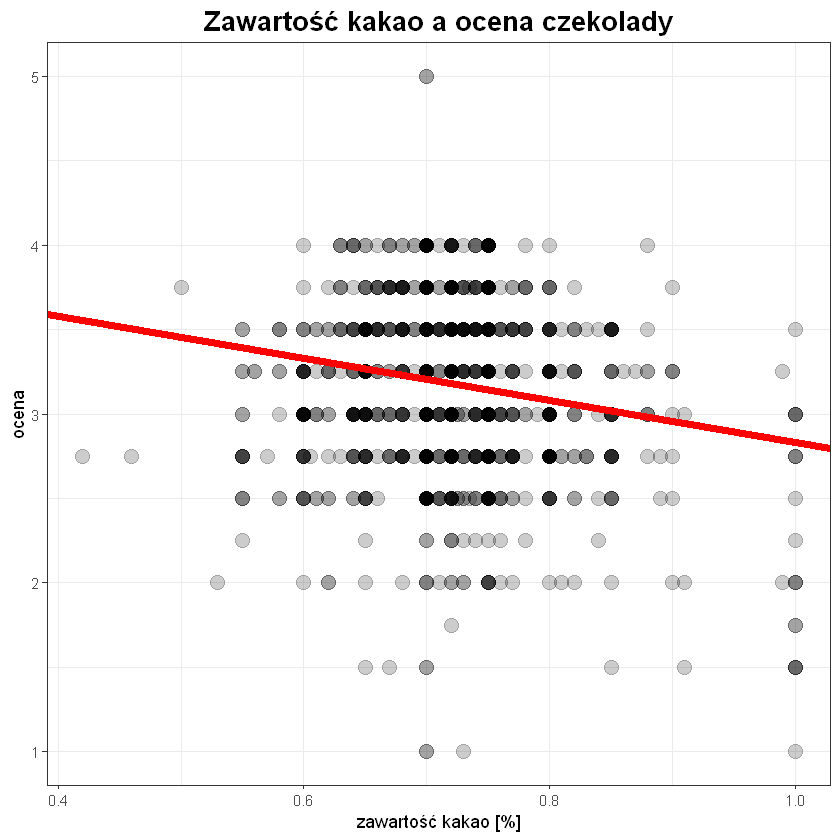

In [24]:
par(mar=c(6,6,6,6))
ggplot(data, aes(x=Cocoa_percent, y=Rating)) +
    geom_point(size=4, color="black",alpha=0.2) +
    ggtitle("Zawartość kakao a ocena czekolady") +
    geom_abline(mapping=aes(slope=model$coefficients[2], intercept=model$coefficients[1]), size=2, color='Red') +
    xlab('zawartość kakao [%]') +
    ylab('ocena') +
    theme(legend.position="none") +
    theme_bw() +
    theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5))

In [25]:
summary(model)


Call:
lm(formula = Rating ~ Cocoa_percent, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2071 -0.3196  0.0429  0.3178  1.7929 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.0794     0.1268  32.183  < 2e-16 ***
Cocoa_percent  -1.2461     0.1761  -7.076 2.12e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4717 on 1793 degrees of freedom
Multiple R-squared:  0.02717,	Adjusted R-squared:  0.02662 
F-statistic: 50.07 on 1 and 1793 DF,  p-value: 2.122e-12


P-wartość testu F dla standardowego alpha = 5% wskazuje na istotność współczynnika kierunkowego regresji liniowej. Z drugiej strony współczynnik determinacji jest bardzo niski (co było wiadome wcześniej po obliczeniu współczynnika korelacji). Rozsądne byłoby zatem odrzucenie powyższego modelu. Jednak zanim to nastąpi sprawdźmy jeszcze czy rozkład reszt jest zbliżony do rozkładu normalnego: 

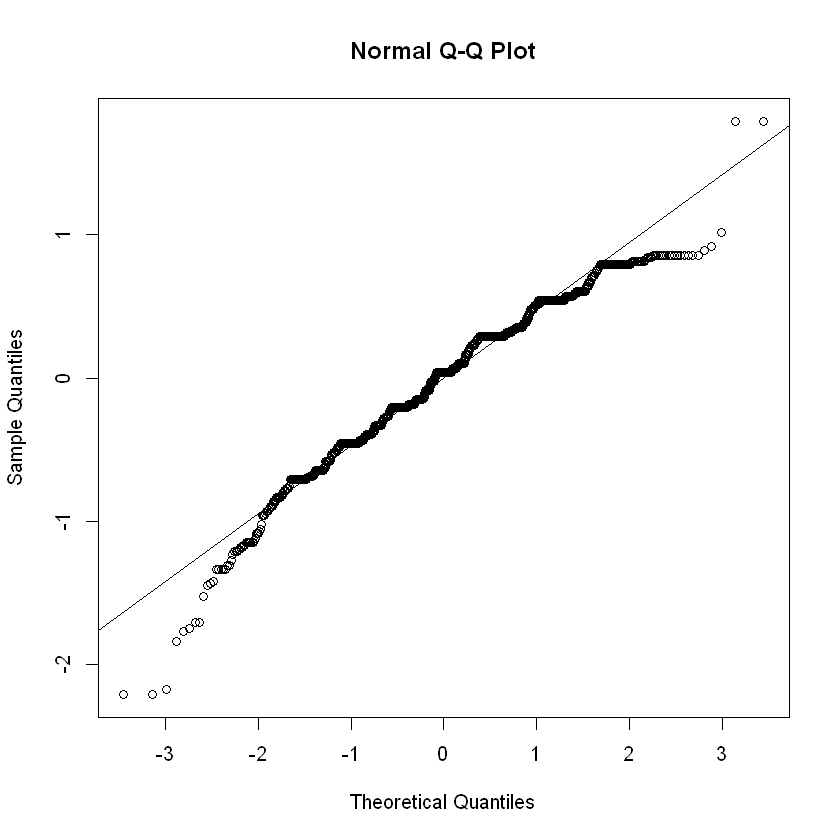

In [26]:
qqnorm(model$residuals)
qqline(model$residuals)

Na powyższym wykresie widać że im większe/mniejsze wartości od zera tym rozkład coraz bardziej różni się od rozkładu normalnego. Rozkład reszt zatem nie jest rozkładem normalnym. W związku z tym nie jest spełnione jedno z założeń regresji liniowej, więc należy odrzucić powyższy model.

# 3) Testy statystyczne

## 3.1) Test Z dla jednej populacji

W związku ze skalą ocen wynoszącą od 1 do 5 postanowiłem sprawdzić czy średnia będzie wynosić 3. W bazie znajduje się 1795 obserwacji, w związku z czym zastosowałem przybliżenie i wykorzystałem dwustronny test Z:

In [27]:
# H0: średnia ocen wynosi 3
# H1: średnia ocen jest różna od 3

alpha <- 0.05
n <- nrow(data)
s <- sd(data$Rating)
x <- mean(data$Rating)
mi <- 3

cat("\nOdch. st. średniej: ")
cat(s/sqrt(n))
z <- (x - mi) / s*sqrt(n)

cat("\n\nWartość statystyki: ")
cat(z)

cat("\n\nPoziom istotności: ")
cat(alpha)
cat("\nP-wartość: ")
cat(2*pnorm(-abs(z)))


Odch. st. średniej: 0.01128372

Wartość statystyki: 16.478

Poziom istotności: 0.05
P-wartość: 5.2804e-61

P-wartość jest mniejsza od poziomu istotności, więc należy odrzucić hipotezą zerową i przyjąć hipotezę alternatywną - średnia ocen jest różna od 3.

## 3.2) Testy Z dla dwóch populacji

Następnie postanowiłem wybrać dwa najczęściej występujące rodzaje ziaren w bazie i sprawdzić czy średnia zawartość kakao w składających się z nich czekoladach będzie taka sama. Ze względu na dużą próbę postanowiłem wykorzystać do tego celu dwustronny test Z dla dwóch populacji:

In [28]:
tri <- subset(data, Bean_type == 'Trinitario')
cat("Trinitario: ")
cat("\nLiczność: ")
cat(nrow(tri))
cat("\nŚrednia ocena: ")
cat(mean(tri$Rating))
cri <- subset(data, Bean_type == 'Criollo')
cat("\n\nCriollo: ")
cat("\nLiczność: ")
cat(nrow(cri))
cat("\nŚrednia ocena: ")
cat(mean(cri$Rating))

Trinitario: 
Liczność: 419
Średnia ocena: 3.245823

Criollo: 
Liczność: 153
Średnia ocena: 3.240196

In [29]:
# H0 średnia zawartość kakao czekolad z ziaren Trinitario = średnia zawartość kakao czekolad z ziaren Criollo
# H1 średnia zawartość kakao czekolad z ziaren Trinitario != średnia zawartość kakao czekolad z ziaren Criollo

n1 <- nrow(tri)
n2 <- nrow(cri)
var1 <- var(tri$Cocoa_percent)
var2 <- var(cri$Cocoa_percent)

alpha <- 0.05
x1 <- mean(tri$Cocoa_percent)
x2 <- mean(cri$Cocoa_percent)
z <- (x1 - x2) / sqrt(var1/n1 + var2/n2)

cat("Wartość statystyki: ")
cat(z)

cat("\nPoziom istotności: ")
cat(alpha)
cat("\nP-wartość: ")
cat(2*pnorm(-abs(z)))

Wartość statystyki: -0.5095386
Poziom istotności: 0.05
P-wartość: 0.6103747

P-wartość jest większa niż przyjęty poziom istotności, więc nie można odrzucić hipotezy zerowej. Test nie jest statystycznie istotny. Nie można zatem stwierdzić czy średnie zawartości kakao różnią się.

W podobny sposób postanowiłem porównać średnią zawartość kakao pomiędzy Francją i Kanadą:

In [30]:
fra <- subset(data, Company_location == 'France')
cat("Francja: ")
cat("\nLiczność: ")
cat(nrow(fra))
cat("\nŚrednia ocena: ")
cat(mean(fra$Rating))
can <- subset(data, Company_location == 'Canada')
cat("\n\nKanada: ")
cat("\nLiczność: ")
cat(nrow(can))
cat("\nŚrednia ocena: ")
cat(mean(can$Rating))

Francja: 
Liczność: 156
Średnia ocena: 3.251603

Kanada: 
Liczność: 125
Średnia ocena: 3.324

In [31]:
# H0 średnia zawartość kakao czekolad z Francji = średnia zawartość kakao czekolad z Kanady
# H1 średnia zawartość kakao czekolad z Francji != średnia zawartość kakao czekolad z Kanady

n1 <- nrow(fra)
n2 <- nrow(can)
var1 <- var(fra$Cocoa_percent)
var2 <- var(can$Cocoa_percent)

alpha <- 0.05
x1 <- mean(fra$Cocoa_percent)
x2 <- mean(can$Cocoa_percent)
z <- (x1 - x2) / sqrt(var1/n1 + var2/n2)

cat("Wartość statystyki: ")
cat(z)

cat("\nPoziom istotności: ")
cat(alpha)
cat("\nP-wartość: ")
cat(2*pnorm(-abs(z)))

Wartość statystyki: -0.7763951
Poziom istotności: 0.05
P-wartość: 0.4375157

P-wartość jest większa niż przyjęty poziom istotności, więc nie można odrzucić hipotezy zerowej. Test nie jest statystycznie istotny. Nie można zatem stwierdzić czy średnie zawartości kakao pomiędzy tymi krajami różnią się.

# 4) Wnioski

- stosowanie heurystyk do wyznaczenia liczby przedziałów szeregu rozdzielczego nie zawsze jest dobrym pomysłem
- mimo że w bazie znajduje się aż 1795 obserwacji, to ciężko na ich podstawie oszacować średnią ocenę lub zawartość kakao dla poszczególnych firm czy krajów, gdyż często składają się one z tylko jednej obserwacji
- nie udało się jednoznacznie stwierdzić, że istnieje związek liniowy między oceną a zawartością kakao
- w związku z powyższym dobrym następnym krokiem mogłoby być sprawdzenie czy istnieje związek między rodzajem/pochodzeniem ziaren a oceną czekolady